<a href="https://colab.research.google.com/github/gshartnett/introAI/blob/main/homeworks/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction to Modern AI - HW 2
Gavin Hartnett  
PRGS, Winter Quarter 2022

This HW is worth 12.5% of your grade. Complete the assignment by making a local copy of this Colab Notebook and filling in the responses in your local copy. If you do not know how to typset math in LaTeX, feel free to email me a scanned piece of paper with your work instead.

In [ ]:
##imports
import numpy as np
from numpy.random import default_rng
rng = default_rng(123)

import matplotlib
import matplotlib.pyplot as plt

## some commands to make the plots look nicer
plt.style.use('seaborn-white')

In [ ]:
## increase the font size
matplotlib.rcParams.update({'font.size': 16})

---
## Problem 1: The Perceptron Learning Algorithm
In class we presented the Perceptron learning algorithm. Let's try to understand where that came from. Recall that the Perceptron model is:

$$
f(x; w) = \text{sign}( w^T x ) =
\begin{cases}
-1 \,, & w^T x < 0 \\
+1 \,, & w^T x > 0
\end{cases}
$$

(Also recall that here we are using the plus/minus convention for binary classification, i.e., $y \in \{-1,1\}$). A natural loss function for binary classification is the 0-1 loss:

$$
L_{0-1}(y, \hat{y}) =
\begin{cases}
0 & y = \hat{y} \\
1 & y \neq \hat{y}
\end{cases} \,.
$$

This is simple enough - you get penalized 1 point for every mistake. This loss function has the nice property that its average corresponds to the error rate - i.e. the metric we often care most about. Of course, an obvious draw back of this loss function is that it's not differentiable (it's not even continuous, and the inputs are themselves discrete variables). So the loss function isn't as informative as we might like - it only tells us if we are right or wrong.

Let's consider the following loss function:

$$ L(y, \hat{y}) = \max\left(0, - y \, \hat{y} \right) \,. $$

This is the same as the 0-1 loss, just written in a more complicated way. Let's verify this:
- If $y = \hat{y}$ (so that $y \hat{y} = 1$), then the loss is 0
- If $y = - \hat{y}$ (so that $y \hat{y} = -1$), the loss is 1.

Even though we've done nothing but rewrite the old loss function, this new form suggests an improved, or "softened" loss function. Let's call the thing that goes into the sign function the score, or pre-activation: $\hat{z} = w^T x$, so that $\hat{y} = \text{sign}(\hat{z})$. If we replace $\hat{y}$ with $\hat{z}$ in the above loss function,

$$ L(y, \hat{z}) = \max\left(0, - y \, \hat{z} \right) \,, $$

we now have a loss function that is differentiable.

**Part A)**  

Plot the loss $ L(y, \hat{z}) = \max\left(0, - y \, \hat{z} \right)$ as a function of $\hat{z}$ for both $y=1$ and $y=-1$.

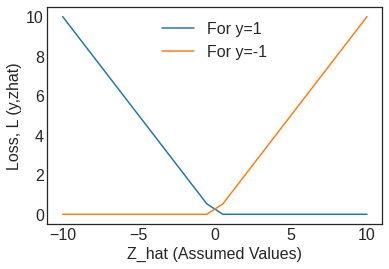

In [ ]:
zhat = np.linspace (-10,10,20)
# for y = 1
L_1=[]
for z in zhat:
  L_1.append(max(0,-1*1*z))

# for y= -1
L_2=[]
for z in zhat:
  L_2.append(max(0,-1*-1*z))

plt.plot (zhat, L_1, label="For y=1")
plt.plot (zhat, L_2, label="For y=-1")
plt.xlabel("Z_hat (Assumed Values)")
plt.ylabel("Loss, L (y,zhat)")
plt.legend()
plt.show()



The plot tells us that the loss penalty (for incorrect predictions) increases linearly as the prediction gets worse. If the prediction is correct, there is no loss penalty.

**Part B)**  
Derive the gradient of the loss $L(y, \hat{z})$ with respect to the weights $w$.

your answer here

**Part C)**  
Having derived the gradient of the loss function, what is the SGD update rule for the weights?

your answer here

Now, let's implement this model "from scratch" (don't worry, I'll help guide you!).

In [ ]:
## import a fake dataset
from sklearn.datasets import make_blobs
N = 200
p = 2
X, y = make_blobs(n_samples=N, centers=p, n_features=2, cluster_std=0.3, random_state=0)

## convert the y-values to {-1, +1}
y = 2*y - 1

## enlarge the X-values to account for the bias term as we did in HW1.
X_enlarged = np.concatenate((X, np.ones(N)[:,None]), axis=1)

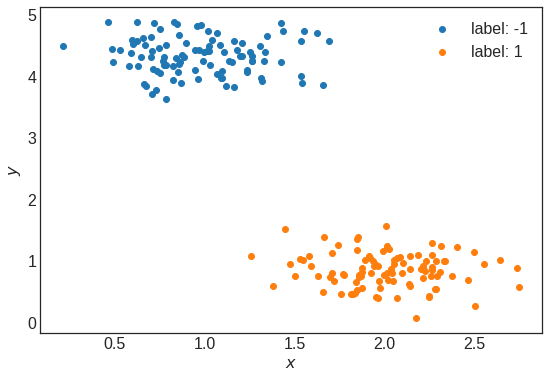

In [ ]:
## plot the data
fig, ax = plt.subplots(figsize=(9,6))
for i in [-1, 1]:
    plt.scatter(X[y==i,0], X[y==i,1], label='label: %i' %i)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.show()

**Part D)**  

Below is a simple class for the Perceptron model. If you don't know what classes are in Python, this would be a good time to do some Googling. Classes come equipped with their own functions which are called methods. Complete the two methods ``predict`` and ``update_weights`` in the class below to implement the Perceptron prediction rule and update rule.
- prediction rule: $\hat{y} = \text{sign}(w^T x)$
- update rule: $\Delta w = - \alpha \nabla_w L(y, w^T x)$

Hint: when you call the weights within the method you need to use `self.w` rather than simply `w`.

In [ ]:
class Perceptron():
    '''This is a class for the Perceptron model.'''
    def __init__(self, p, lr=0.05):
        self.w = default_rng(4).standard_normal(size=p)
        self.lr = lr #the learning rate

    def predict(self, X):
        zhat = np.dot(X, self.w)
        yhat = np.sign(zhat)
        #print(zhat.shape)
        #yhat = 1 if zhat >= 0.0 else -1
        #print(yhat.shape)
        return yhat

    def update_weights(self, X, y):
      y_pred = self.predict(X)
      if y_pred != y:
        self.w = self.w + self.lr*y*X
      return self.w

Now, let's train the model and visualize the result. The following code should successfully train the Perceptron if you've done the above exercises correctly.

In [ ]:
## init the model
model = Perceptron(p+1)
model.w

array([-0.65179115, -0.17471729,  1.66372399])

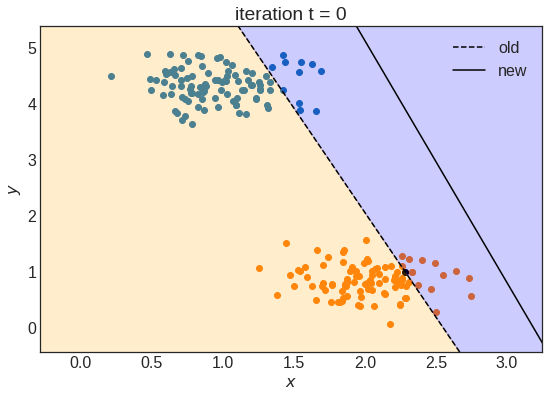

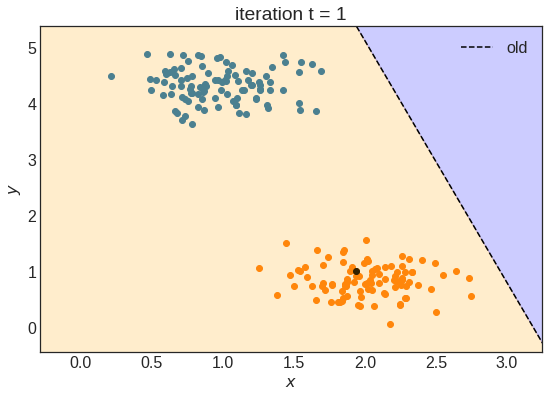

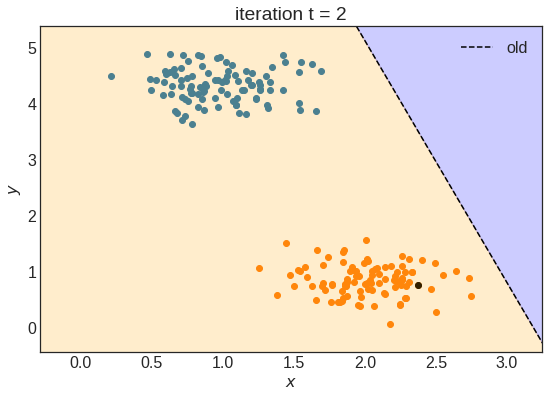

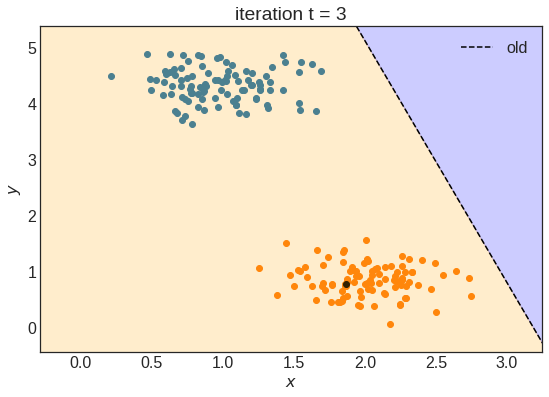

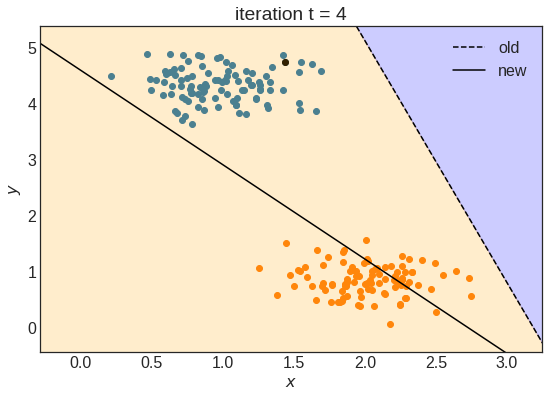

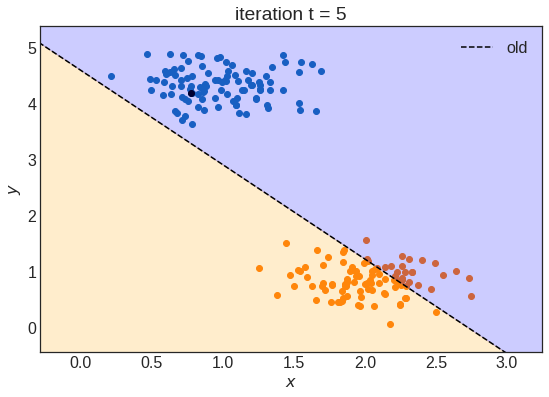

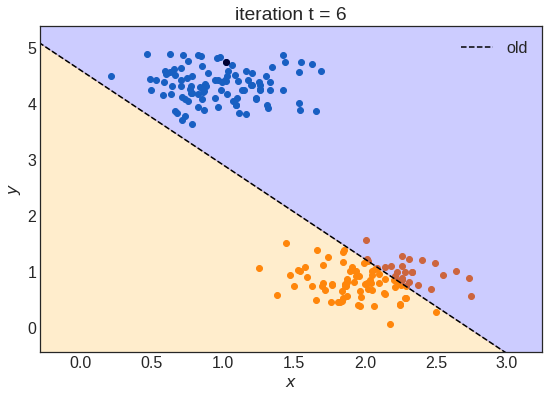

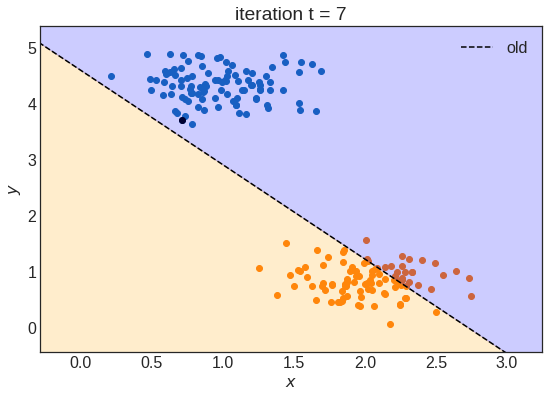

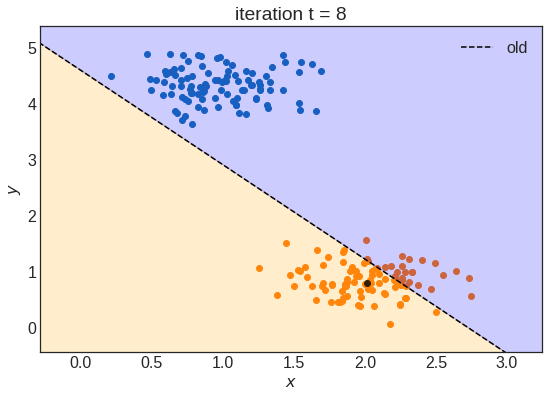

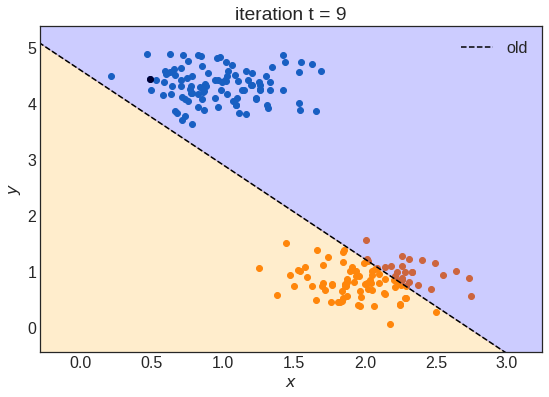

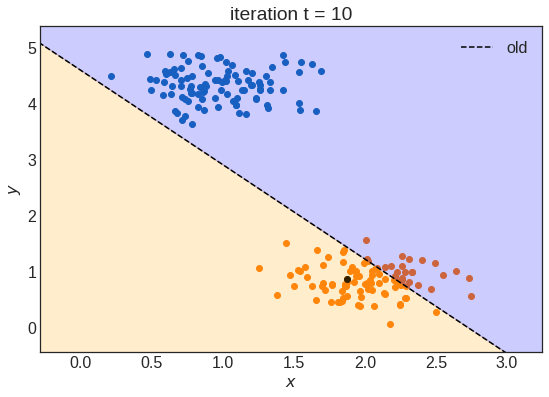

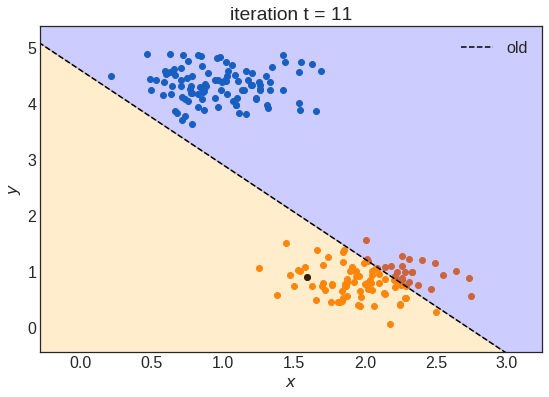

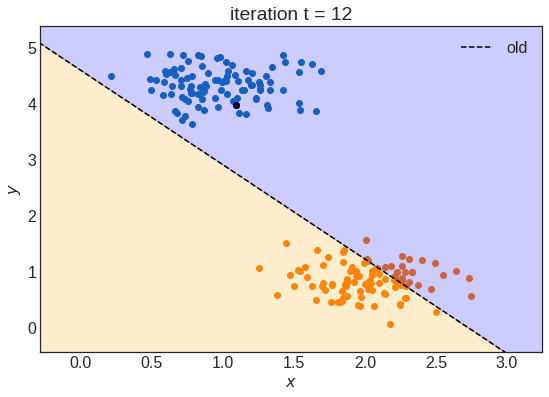

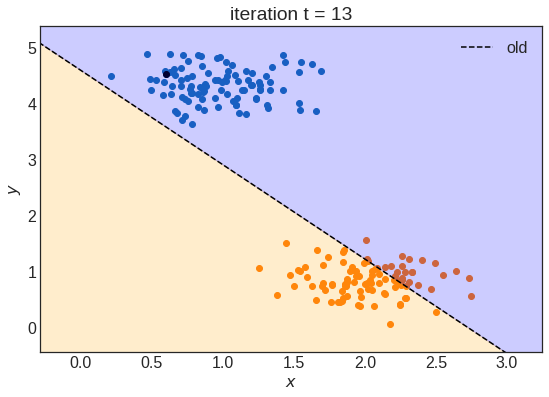

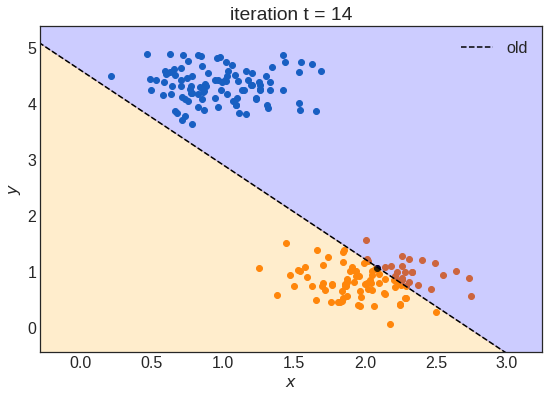

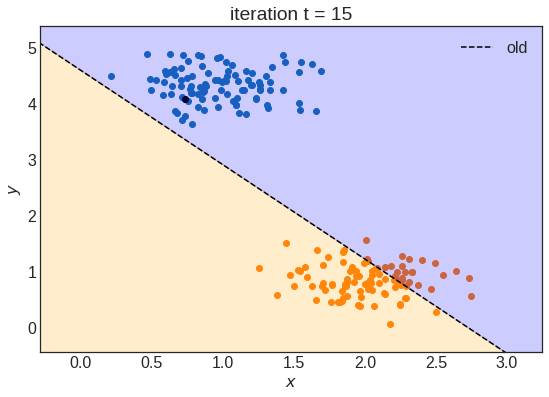

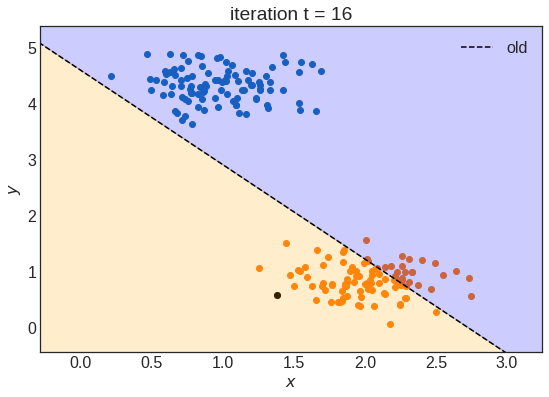

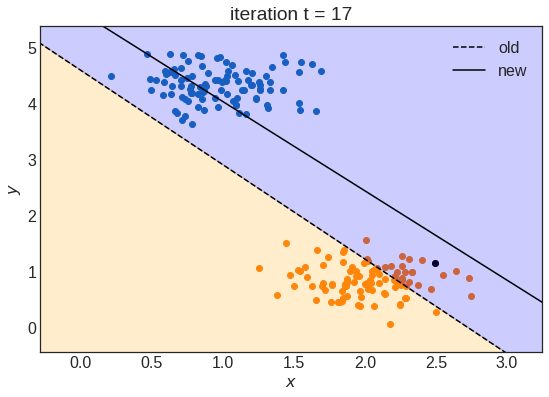

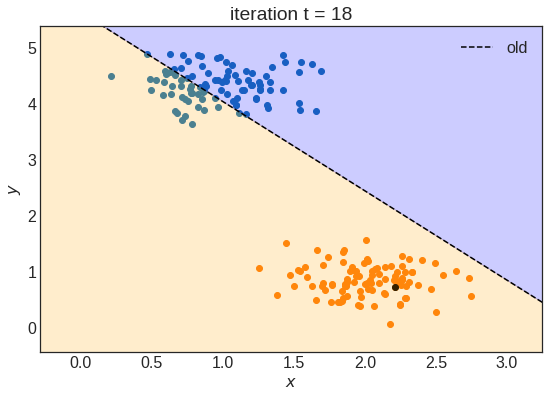

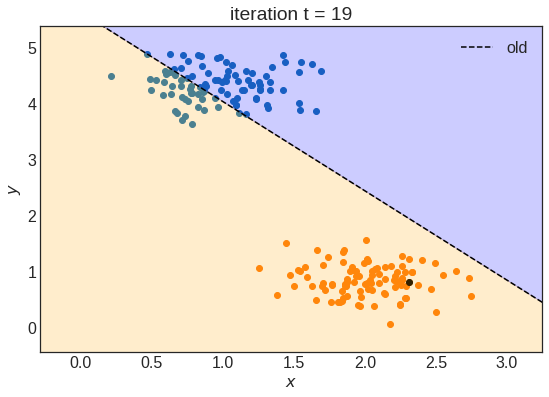

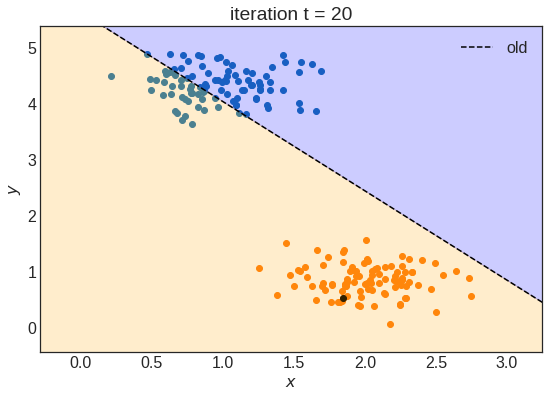

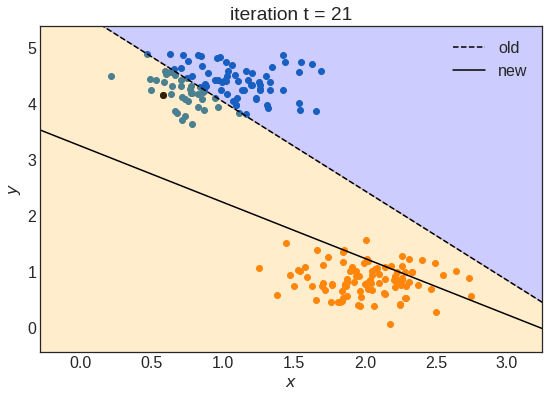

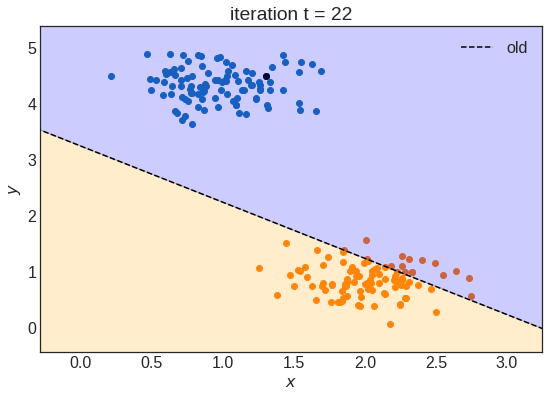

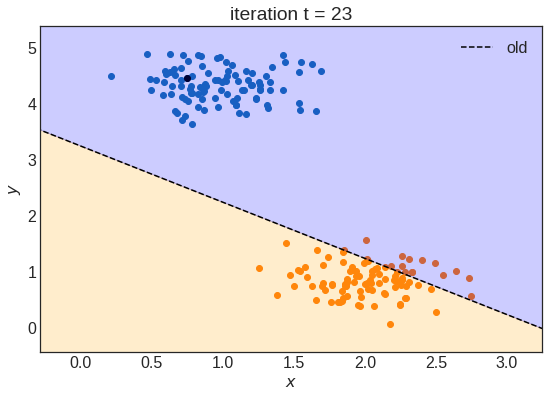

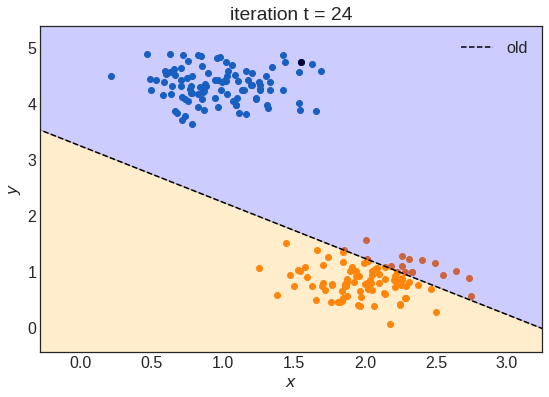

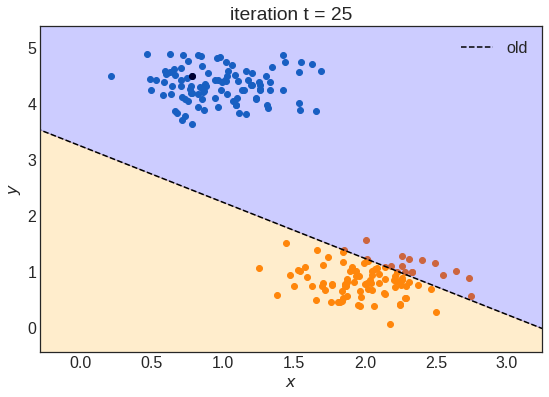

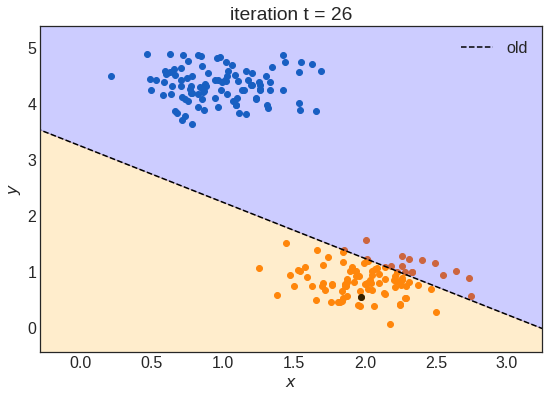

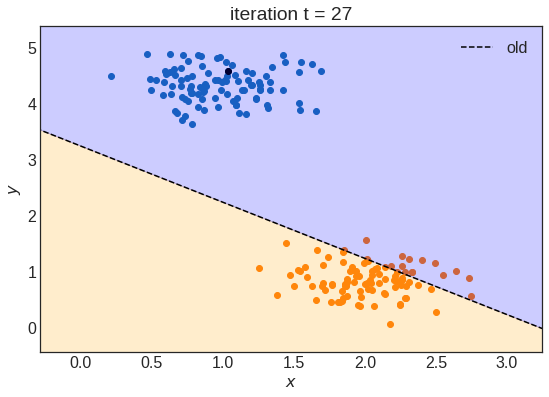

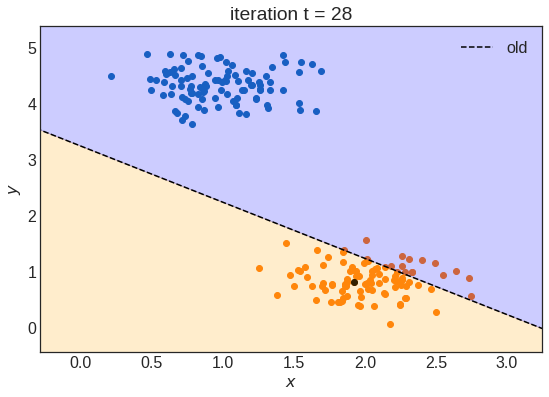

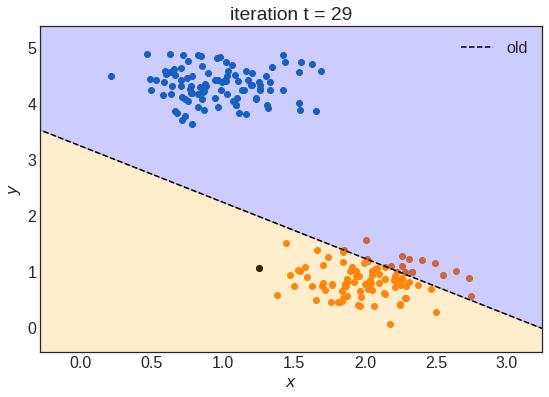

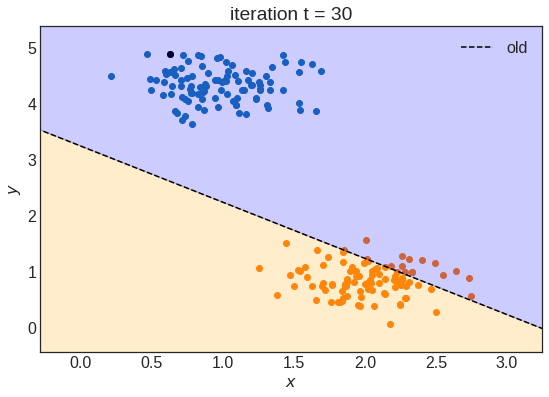

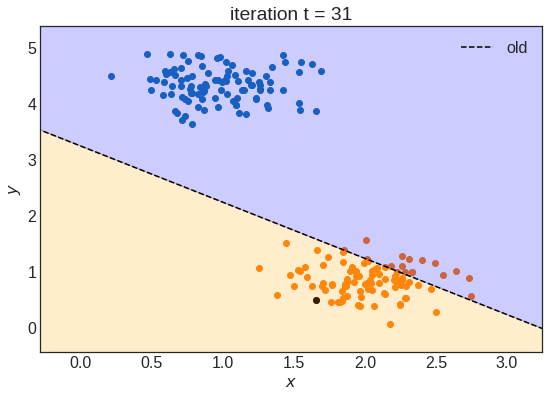

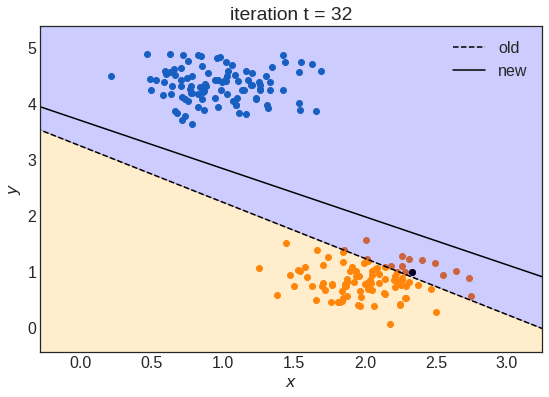

In [ ]:
max_iters = 100

## get the range of the data
xmin = np.min(X[:,0])
xmax = np.max(X[:,0])
ymin = np.min(X[:,1])
ymax = np.max(X[:,1])

## build an array of x-values for plotting
xlist = np.linspace(-5, 5, 1000)

## halt the updating if perfect accuracy is achieved
i = 0
while np.mean(model.predict(X_enlarged) == y) < 1 and i < max_iters:

    ## start a new plot for each iteration
    fig, ax = plt.subplots(figsize=(9,6))

    ## plot the raw data
    for k in [-1, 1]:
        ax.scatter(X[y==k,0], X[y==k,1])
    ## color the current point in black
    ax.scatter(X[i,0], X[i,1], c='k')

    ## plot the old decision boundary
    ylist_old = -model.w[0]*xlist/model.w[1] - model.w[2]/model.w[1]
    ax.plot(xlist, ylist_old, color='k', alpha=1, linestyle='--', label='old')
    ax.fill_between(xlist,  ylist_old, y2=-1000, color='orange', alpha=0.2)
    ax.fill_between(xlist,  ylist_old, y2=1000, color='blue', alpha=0.2)

    ## update the model
    yhat_i_old = model.predict(X_enlarged[i])
    model.update_weights(X_enlarged[i], y[i])
    yhat_i_new = model.predict(X_enlarged[i])

    ## if prediction changes, plot the new decision boundary
    if yhat_i_old != yhat_i_new:
        ylist_new = -model.w[0]*xlist/model.w[1] - model.w[2]/model.w[1]
        ax.plot(xlist, ylist_new, color='k', alpha=1, label='new')

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title('iteration t = %i' %i)
    ax.set_xlim([xmin - 0.5, xmax + 0.5])
    ax.set_ylim([ymin - 0.5, ymax + 0.5])
    plt.legend(loc='upper right')

    plt.show()
    i += 1

In [ ]:
model.w.shape

(3,)

Debrief:

In addition to introducing some new concepts and testing your ability to implement some ML ideas in Python, some take-aways from this problem are that:
- The Perceptron update rule/learning algorithm is just stochastic gradient descent
- The loss function is one we hadn't encountered before, but it seems sensible as a surrogate loss for the 0-1 loss
- The Perceptron is a close cousin to logistic regression, both are linear classifiers. Some key differences are the choice of loss function, and the activation (sigmoid vs sign).

---
## Problem 2: Bias-Variance Trade-Off

In lecture we discussed the bias-variance trade-off. This is the idea that the error of a *any* model can be decomposed into 3 distinct components:
- An irreducible loss, capturing the fact that even if we had a perfect model there will be error due to the noise
- A bias loss, capturing the idea that our model might be biased towards the wrong class of functions (incorrectly modeling the signal). A good example of this would be using a linear model for a non-linear problem.
- A variance loss, capturing the idea that even an unbiased model will move around its mean.

In this problem you will derive the bias-variance decomposition for the MSE loss function.

**Set-Up**  
Here are some useful definitions and conventions you will need:
- $\mathbb{E}[X]$ will denote the expectation value (i.e., mean, or average) of a random variable $X$
- When multiple random variables are involved, we sometimes use a subscript to indicate which variable the expectation refers to. For example, if $Y = f(X) + \epsilon$, and both $X$ and $\epsilon$ are random, then $\mathbb{E}_{\epsilon}[Y]$ indicates that we are averaging over the noise variable $\epsilon$ and not the data variable $X$.
- $\text{Var}[X] = \mathbb{E}\left[ \left( X - \mathbb{E}[X] \right)^2 \right]$ is the variance of $X$
- If we have an estimate $\hat{x}$ of a random variable $X$, then the bias of the estimate is defined as $\text{Bias}[\hat{x}] = (\hat{x} - \mathbb{E}[X])$
    - In other words, the bias measures how much the estimate deviates from the true value.

**Part A)**  
Derive the bias-variance trade-off equation for an arbitrary regression model $\hat{f}(x;\mathcal{D})$. Treat the dataset as a collection of random variables, so that $\hat{f}$ is itself a random variable. Assume that the true relationship between the input and output variables is given by $y = f(x) + \epsilon$, with $f$ a deterministic function and $\epsilon$ a random variable with $\mathbb{E}[\epsilon] = 0$ (zero mean) and $\text{Var}[\epsilon] = \sigma^2$. To be concrete, the starting expression is

$$ \text{MSE}(x) = \mathbb{E}_{\epsilon, \mathcal{D}} \left[ \left( y(x) - \hat{f}(x; \mathcal{D}) \right)^2 \right] \,. $$

Your answer here.

---
## Problem 3: kNN for Handwritten Digits Classification

In this problem we will consider classification of handwritten digits. The data (i.e., the $\boldsymbol{x}_i$) in this case correspond to images, meaning this problem is an example of a computer vision problem. There are specialized methods for such problems that we will cover in a few weeks, but for now we will use the methods we have covered up to this point.

In [ ]:
## load the dataset
import sklearn, sklearn.datasets
X, y = sklearn.datasets.load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

There are 1797 images in the dataset, and each image corresponds to a 64-dimensional vector. The images were originally digital images with resolution 8x8, but they were flattened, meaning the 8x8 matrices of raw pixel values were converted into 64-dimensional vectors. Each entry in the X data represents a pixel value that can take on an integer value.

In [ ]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

The y-values correspond to the label (in this case, the digit 0-9).

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

Let's visualize these to gain a better sense for the data

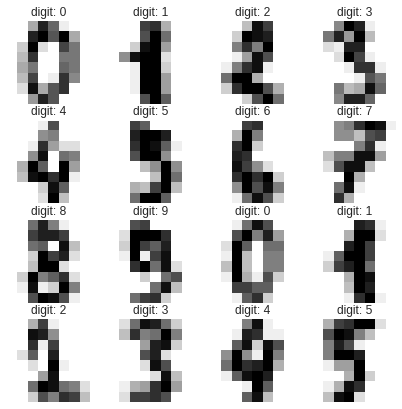

In [ ]:
fig = plt.figure(figsize=(7,7))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X[i].reshape((8,8)), cmap='binary')
    plt.title('digit: %i' %y[i], fontsize=12)
    plt.axis('off')
plt.show()

**Part A)**  

What is the minimum and maximum value for $X$? Assuming that each entry can take on an integer value within that range, how many distinct $X$ values (images) are there? Express this number as a power of 10 (i.e., $N = 10^d$ for some $d$).

Answer: The minimum value of X is 0 and maximum value of X is 9. There are $10^1$  distinct X values or images.

**Part B)**  
Having learned about the proper way to do model selection and evaluation, write code that splits the data $(X,y)$ into 3 disjoint sets,

$$ (X_{\text{train}}, y_{\text{train}}) \,, \quad (X_{\text{val}}, y_{\text{val}}) \,, \quad (X_{\text{test}}, y_{\text{test}}) \,.$$

Let's use a splitting ratio of 60/20/20.

In [ ]:
from sklearn.model_selection import train_test_split
#In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)
# Since we want the valid and test size to be equal (20% each of overall data), we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(1078, 64)
(359, 64)
(360, 64)


**Part C)**  
Next, let's train a kNN classifier on this. Using the [docs page for the scikit-learn implementation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), fit a model with $k=5$ to the train data and evaluate the accuracy on all 3 datasets.

In [ ]:
from sklearn import neighbors

In [ ]:
#importing KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5) # Initialize a knn object
knn.fit(X_train, y_train)
# Testing accuracy for valid
yhat_valid = knn.predict(X_valid)
score_valid = metrics.accuracy_score(y_valid, yhat_valid)
# Testing accuracy for testing
yhat_test = knn.predict(X_test)
score_test = metrics.accuracy_score(y_test, yhat_test)

print("The Accuracy score for Valid Dataset is:", score_valid)
print("The Accuracy score for Test Dataset is:", score_test)


The Accuracy score for Valid Dataset is: 0.9888579387186629
The Accuracy score for Test Dataset is: 0.9861111111111112


**Part D)**  
Let's use the validation set to pick the best $k$ value. For $k=1, ..., 100$, fit a kNN model to the train data, and make a plot of the validation set loss as a function of $k$. What is the optimal value of $k$?

For the loss function we will use the cross-entropy loss, as implemented in scikit-learn: [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html). Below is some helper code.

In [ ]:
## helper code
## the loss function accepts as inputs the true labels and
## the predicted probabilities
from sklearn.metrics import log_loss
k_range = range (1,100)
log_loss_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  log_loss_list.append (log_loss(y_valid, knn.predict_proba(X_valid)))


1

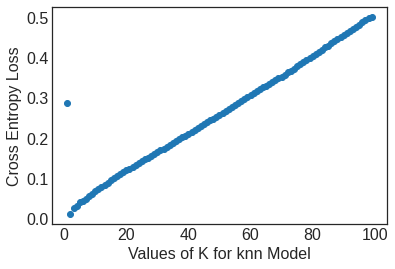

In [ ]:
# Plotting k with cross entropy loss

import matplotlib.pyplot as plt
#plt.plot(k_range, log_loss_list)
plt.scatter(k_range, log_loss_list)
plt.xlabel("Values of K for knn Model")
plt.ylabel("Cross Entropy Loss")
log_loss_list.index(min(log_loss_list))


**Part E)**  
Using this optimal value of $k$, evaluate the test set accuracy.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2) # Initialize a knn object
knn.fit(X_train, y_train)
log_loss(y_test, knn.predict_proba(X_test))

0.3972420440099045

---
## Problem 4: Gradient Descent

In this problem we will revisit the example covered in class (week 2) of gradient descent applied to a quadratic loss function:

$$ L(w) = \frac{1}{2} w^T A w - b^T w \,. $$

If we diagonalize the matrix $A$ and transform to an eigenbasis $x = O w$, with

$$ A = O^{-1} \Lambda O \,, \qquad b = O^{-1} b' \,, \qquad \Lambda = (\lambda_1, ..., \lambda_d) \,, $$

then we found that the update could be solved for all times
    
$$ x_a^{t+1} = \left( 1 - \alpha \lambda_a \right)^{t+1} x_a^0 + \alpha b_a' \sum_{k=0}^t \left( 1 - \alpha \lambda_a \right) \,. $$

Let's assume that the matrix $A$ is positive definite, which means that all the eigenvalues are positive: $\lambda_a > 0$ for $a = 1, ..., d$. Then, gradient descent will converge if the first term is smaller than 1 in absolute value, which is equivalent to $0 < \alpha \lambda_a < 2$.

**Part A)**  
Prove this, namely that $|1 - \alpha \lambda_a| < 1$ implies that $0 < \alpha \lambda_a < 2$.



```
# This is formatted as code
```
Answer attached as separate document.

The inequality we just proved, $0 < \alpha \lambda_a < 2$, must hold for all of the indices $a=1,...,d$ in order for gradient descent to converge in all eigendirections. The rate of converence for a single dimension is:

$$ \text{rate}_a(\alpha) = |1 - \alpha \lambda_a| \,. $$

(Note that rate is a potentially confusing term for this, as if this quantity is close to 1, then convergence is very slow, whereas if this quantity is close to 0, then convergence is very rapid. So, in this case a smaller rate corresponds to faster convergence.)

The overall rate will be the largest of these,

$$ \text{rate}(\alpha) = \max_a |1 - \alpha \lambda_a| \,. $$

This expression can be can be simplified to:

$$ \text{rate}(\alpha) = \max\left( |1-\alpha \lambda_1|, |1-\alpha \lambda_d| \right) \,. $$

To justify this, recall that $0 < \alpha \lambda_a < 2$. The rate vanishes if $\alpha \lambda_a = 1$, and it approaches the maximal value of 1 if either $\alpha \lambda_a$ is close to zero, or close to 2. Therefore, we can restrict our attention to just the smallest and largest of the eigenvalues.

**Part B)**  
Given the above expression, what is the optimal learning rate $\alpha_* = \text{argmin}_{\alpha} \, \text{rate}(\alpha)$?

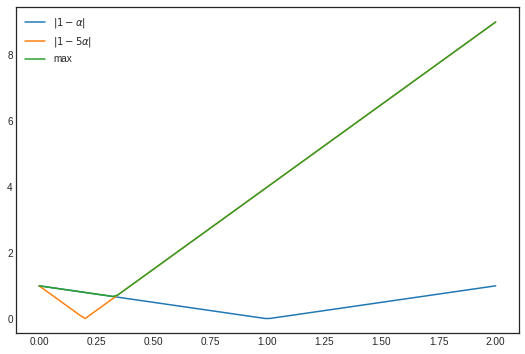

In [ ]:
# Intuition behind the solution

alpha = np.linspace (0,2,100)
lamb1 = 1
lambn = 5

fig, ax = plt.subplots (figsize = (9,6))
plt.plot (alpha, np.abs(1-lamb1*alpha), label = r"$|1-\alpha|$")
plt.plot (alpha, np.abs(1-lambn*alpha), label = r"$|1-5\alpha|$")
plt.plot(alpha, [max(np.abs(1-alpha[i]), np.abs(1-5*alpha[i])) for i in range(len(alpha))], label = "max")
plt.legend()
plt.show()

# The problem depends on two eigenvalues, lambda_1, and lambda_n. Let's just pick random values for these and plot the two different rates.
# By looking in graph, Notice anything special about the smallest value the max curve obtains?
# The smallest value of the max curve happens when the two curves are equal

# So to get the optimal learning rate, equate both the graphs.


Answer attached as separate document.

your answer here

**Part C)**  
Finally, what is the optimal rate, $\text{rate}(\alpha_*)$?

Attached as separate doc.